In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as math
import scipy.stats as stats
import statsmodels.api as sm

yearlyDf = pd.DataFrame()
for x in range(1999,2020):
    #pull all the code from the fantasy football data github repo
    tempdf = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/{}.csv'.format(str(x)))
    tempdf['Year'] = x
    yearlyDf = pd.concat([yearlyDf,tempdf])
    #since the strength of schedule and yearly data do not have the same category for team names,
    #we had to make them the same for our comparisons later on in the code. 
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['ARI'], 'Arizona Cardinals')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['ATL'], 'Atlanta Falcons')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['BAL'], 'Baltimore Ravens')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['BUF'], 'Buffalo Bills')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['CAR'], 'Carolina Panthers')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['CHI'], 'Chicago Bears')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['CIN'], 'Cincinnati Bengals')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['CLE'], 'Cleveland Browns')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['DAL'], 'Dallas Cowboys')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['DEN'], 'Denver Broncos')
    
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['DET'], 'Detroit Lions')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['STL'], 'Saint Louis Rams')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['GNB'], 'Green Bay Packers')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['HOU'], 'Houston Texans')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['IND'], 'Indianapolis Colts')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['JAX'], 'Jacksonville Jaguars')
    
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['KAN'], 'Kansas City Chiefs')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['MIA'], 'Miami Dolphins')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['MIN'], 'Minnesota Vikings')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['NWE'], 'New England Patriots')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['NOR'], 'New Orleans Saints')
    
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['NYG'], 'New York Giants')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['NYJ'], 'New York Jets')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['OAK'], 'Oakland Raiders')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['PHI'], 'Philadelphia Eagles')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['PIT'], 'Pittsburgh Steelers')
    
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['LAC'], 'Los Angeles Chargers')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['SFO'], 'San Francisco 49ers')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['SEA'], 'Seattle Seahawks')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['LAR'], 'Los Angeles Rams')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['TAM'], 'Tampa Bay Buccaneers')
    
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['TEN'], 'Tennessee Titans')
    yearlyDf['Tm'] = yearlyDf['Tm'].replace(['WAS'], 'Washington Commanders')

yearlyDf = yearlyDf.loc[yearlyDf['GS'] > 11] #remove insignificant data
yearlyDf.drop(['Unnamed: 0', 'Age', 'Pos', 'PassingYds', 'RushingYds', 'ReceivingYds', 'GS', 'G', 'Tgt','Rec','PassingTD','PassingAtt','RushingTD','RushingAtt','ReceivingTD','Int','Fumbles','FumblesLost'],axis=1,inplace=True)
print(yearlyDf)



              Player                     Tm  FantasyPoints  Year
0     Marshall Faulk       Saint Louis Rams         397.90  1999
1     Edgerrin James     Indianapolis Colts         369.90  1999
2        Kurt Warner       Saint Louis Rams         317.32  1999
3      Stephen Davis  Washington Commanders         274.60  1999
4       Eddie George       Tennessee Titans         293.20  1999
..               ...                    ...            ...   ...
264      C.J. Uzomah     Cincinnati Bengals          63.20  2019
277    Kyle Juszczyk    San Francisco 49ers          50.60  2019
282  Jeremy Sprinkle  Washington Commanders          56.10  2019
421    Durham Smythe         Miami Dolphins          13.50  2019
598      Nate Solder        New York Giants           0.00  2019

[2551 rows x 4 columns]


In [2]:
sosDf = pd.DataFrame()
for x in range(1999,2020):
    #pull stregnth of schedule data
    tempdf2 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/sos/{}.csv'.format(str(x)))
    tempdf2['Year'] = x
    sosDf = pd.concat([sosDf,tempdf2])

sosDf.drop(['OppPPRFantasyPointsAllowed', 'PPRSOSRank', 'OppStandardFantasyPointsAllowed', 'OppHalfPPRFantasyPointsAllowed', 'HalfPPRSOSRank', 'OppRushingFantasyPointsAllowed', 'RushingSOSRank', 'OppPassingFantasyPointsAllowed', 'PassingSOSRank', 'OppPPRReceivingFantasyPointsAllowed', 'PPRReceivingSOSRank', 'OppHalfPPRReceivingFantasyPointsAllowed', 'HalfPPRReceivingSOSRank', 'OppStandardReceivingFantasyPointsAllowed', 'StandardReceivingSOSRank'], axis=1,inplace=True) 
sosDf.rename(columns = {'Unnamed: 0':'Team'}, inplace = True)
print(sosDf.head())


                   Team  StandardSOSRank  Year
0        St. Louis Rams             31.0  1999
1     Carolina Panthers             30.0  1999
2  Jacksonville Jaguars             29.0  1999
3  Tampa Bay Buccaneers             26.0  1999
4   San Francisco 49ers             28.0  1999


In [3]:
#Test code to see if SOS and yearly dataframes use the same team titles
for x in range(0, 2):
    checkYearName = yearlyDf.loc[x, 'Tm']
    for y in range(0, 2):
        checkSOSName = sosDf.loc[y, 'Team']
        if str(checkYearName) == str(checkSOSName):
            print("test")
        
        #if(yearlyDf.loc[x, 'Tm'] == sosDf.loc[y, 'Team']): #sosDf.loc[y].at["Team"]):
            #print("test")
        

In [4]:
tuple_list = [] #put all necessary data into a list of truples
for index, row in yearlyDf.iterrows():    
    player_year = row['Year']
    player_team = row['Tm']
    player_name = row['Player']
    player_points = row['FantasyPoints']
    player_SOSdf = sosDf.loc[sosDf['Team'] == player_team]
    player_sosdf2 = player_SOSdf.loc[player_SOSdf['Year'] == player_year]
    if not player_sosdf2.empty:
        player_sos = player_sosdf2['StandardSOSRank'].values[0]
    else: player_sos = 'null'
    player_tuple = (player_name, player_points, player_sos)
    tuple_list.append(player_tuple)
    

In [5]:
tuple_list2 = []
for x in tuple_list:
    if x[2] != 'null':
        tuple_list2.append(x)
#print(tuple_list2)

sosList = [x[2] for x in tuple_list2] #separate the SOS data (x axis for graphs)
pointsList = [x[1] for x in tuple_list2] #separate the points of each player data (y axis for graphs)

Text(0, 0.5, 'Standard Fantasy Points for a Player')

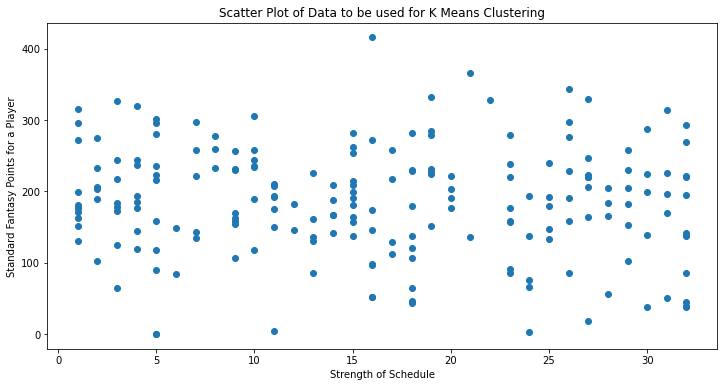

In [6]:
import random
sosSample = random.sample(sosList, 200)
pointsSample = random.sample(pointsList, 200)
fig1, ax1 = plt.subplots(figsize =(12,6))
ax1.scatter(sosSample, pointsSample)
plt.title('Scatter Plot of Data to be used for K Means Clustering')
plt.xlabel('Strength of Schedule')
plt.ylabel('Standard Fantasy Points for a Player')

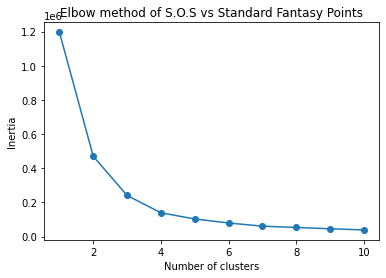

In [7]:
#This code covering KMeans Cluster Analysis is based on the documentation from W3schools
#Link: https://www.w3schools.com/python/python_ml_k-means.asp
from sklearn.cluster import KMeans
data = list(zip(sosSample, pointsSample))
inertias_of_data = []

increment = 1
while(increment != 11):
    kmeans_of_data = KMeans(n_clusters=increment).fit(data)
    inertias_of_data.append(kmeans_of_data.inertia_)
    increment+= 1
    
plt.plot(range(1,11), inertias_of_data, marker='o')
plt.title('Elbow method of S.O.S vs Standard Fantasy Points')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

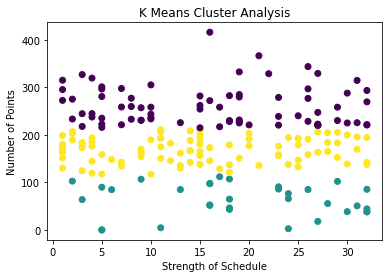

In [8]:
#run the final kmeans clustering based on number of clusters taken from elbow method. 
final_kmeans = KMeans(n_clusters=3).fit(data)

plt.scatter(sosSample, pointsSample, c=final_kmeans.labels_)
plt.title('K Means Cluster Analysis')
plt.xlabel('Strength of Schedule')
plt.ylabel('Number of Points')
plt.show()